In [11]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.metrics import r2_score

In [2]:
X,y = make_regression(n_samples=200, n_features=10, n_informative=2, n_targets=1 , noise=50, random_state=4)

In [3]:
X.shape

(200, 10)

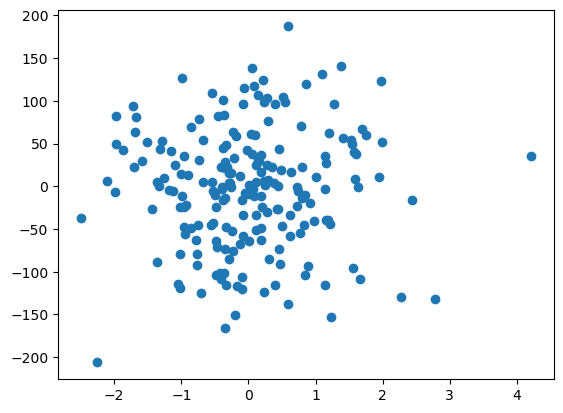

In [4]:
plt.scatter(X[:,1],y)

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score

In [6]:
lr = LinearRegression()
dt = DecisionTreeRegressor()
svr = SVR()

In [7]:
estimators = [('lr',lr),('dt',dt),('svr',svr)]

In [13]:
for estimator in estimators:
    x = cross_val_score(estimator[1],X,y,cv=10,scoring='r2')
    print(estimator[0],np.round(np.mean(x),2))

lr 0.49
dt -0.07
svr 0.01


In [14]:
from sklearn.ensemble import VotingRegressor

In [15]:
vr = VotingRegressor(estimators=estimators)
x = cross_val_score(vr,X,y,cv=10,scoring='r2')
print('Voting Regressor: ',np.round(np.mean(x),2))

Voting Regressor:  0.39


In [19]:
for i in range(1,4):
    for j in range(1,4):
        for k in range(1,4):
            vr = VotingRegressor(estimators=estimators,weights=[i,j,k])
            x = cross_val_score(vr,X,y,cv=10,scoring='r2')
            print('for i={}, j={},k={}'.format(i,j,k),np.round(np.mean(x),2))


for i=1, j=1,k=1 0.38
for i=1, j=1,k=2 0.34
for i=1, j=1,k=3 0.31
for i=1, j=2,k=1 0.34
for i=1, j=2,k=2 0.31
for i=1, j=2,k=3 0.31
for i=1, j=3,k=1 0.29
for i=1, j=3,k=2 0.29
for i=1, j=3,k=3 0.29
for i=2, j=1,k=1 0.43
for i=2, j=1,k=2 0.4
for i=2, j=1,k=3 0.36
for i=2, j=2,k=1 0.39
for i=2, j=2,k=2 0.4
for i=2, j=2,k=3 0.36
for i=2, j=3,k=1 0.37
for i=2, j=3,k=2 0.33
for i=2, j=3,k=3 0.35
for i=3, j=1,k=1 0.46
for i=3, j=1,k=2 0.43
for i=3, j=1,k=3 0.4
for i=3, j=2,k=1 0.42
for i=3, j=2,k=2 0.39
for i=3, j=2,k=3 0.4
for i=3, j=3,k=1 0.36
for i=3, j=3,k=2 0.38
for i=3, j=3,k=3 0.37


In [22]:
dt1 = DecisionTreeRegressor(max_depth=1)
dt2 = DecisionTreeRegressor(max_depth=3)
dt3 = DecisionTreeRegressor(max_depth=5)
dt4 = DecisionTreeRegressor(max_depth=7)
dt5 = DecisionTreeRegressor(max_depth=None)

In [27]:
estimators1 = [('dt1',dt1),('dt2',dt2),('dt3',dt3),('dt4',dt4),('dt5',dt5)]

In [28]:
for estimator in estimators1:
    x = cross_val_score(estimator[1],X,y,cv=10,scoring='r2')
    print(estimator[0],np.round(np.mean(x),2))

dt1 0.34
dt2 0.42
dt3 0.12
dt4 0.01
dt5 -0.03


In [29]:
vr = VotingRegressor(estimators=estimators1)
x = cross_val_score(vr,X,y,cv=10,scoring='r2')
print(np.round(np.mean(x),2))

0.34
